# Fraud Detection

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#setting display  options and warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

#### Load Dataset

In [6]:
df = pd.read_csv("C:/Users/suyas/Downloads/CreditCardData.csv")
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [8]:
df_describe = df.describe(include='all')
df_describe

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000,100000,100000,100000.000000,100000,100000,99994,100000,99990,100000,99995,100000,99996,100000.000000,100000,100000.000000
unique,95680,4,4,NaN,2,3,396,3,10,5,5,5,2,NaN,8,NaN
top,#2547 017,14-Oct-20,Wednesday,NaN,Visa,PIN,£17,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,NaN,Barclays,NaN
freq,5,50184,50177,NaN,53812,49976,2153,33481,10679,71199,60905,81859,50875,NaN,29936,NaN
mean,NaN,NaN,NaN,14.562870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.993770,NaN,0.071950
std,NaN,NaN,NaN,5.308195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.948494,NaN,0.258406
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000
25%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.200000,NaN,0.000000
50%,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.900000,NaN,0.000000
75%,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.700000,NaN,0.000000


#### Data Cleainng

In [9]:
#Convert 'Amount' by removing currency symbol and converting to float
df['Amount'] = df['Amount'].replace('[£,]', '',regex=True).astype(float)

In [10]:
#check for missing values and handle them
missing_values = df.isnull().sum()
missing_values

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [11]:
# Filling missing values 
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Merchant Group'].fillna(df['Merchant Group'].mode()[0], inplace=True)
df['Shipping Address'].fillna(df['Shipping Address'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [12]:
# Verify data after cleaning
data_cleaned_summary = df.describe(include='all')
data_cleaned_summary

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
count,100000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000,100000,100000,100000,100000,100000.000000,100000,100000.000000
unique,95680,4,4,NaN,2,3,NaN,3,10,5,5,5,2,NaN,8,NaN
top,#2547 017,14-Oct-20,Wednesday,NaN,Visa,PIN,NaN,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,NaN,Barclays,NaN
freq,5,50184,50177,NaN,53812,49976,NaN,33481,10689,71199,60910,81859,50879,NaN,29936,NaN
mean,NaN,NaN,NaN,14.562870,NaN,NaN,112.573560,NaN,NaN,NaN,NaN,NaN,NaN,44.993770,NaN,0.071950
std,NaN,NaN,NaN,5.308195,NaN,NaN,123.431847,NaN,NaN,NaN,NaN,NaN,NaN,9.948494,NaN,0.258406
min,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000
25%,NaN,NaN,NaN,10.000000,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,38.200000,NaN,0.000000
50%,NaN,NaN,NaN,15.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.900000,NaN,0.000000
75%,NaN,NaN,NaN,19.000000,NaN,NaN,208.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.700000,NaN,0.000000


In [13]:

missing_values_after_cleaning = df.isnull().sum()
missing_values_after_cleaning

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

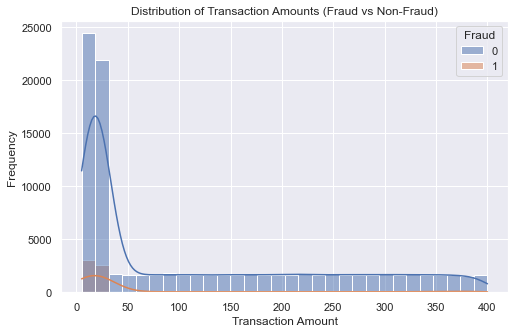

In [14]:
# 1. Distribution of transaction amounts for fraudulent vs non-fraudulent transactions
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Amount', hue='Fraud', bins=30, kde=True)
plt.title("Distribution of Transaction Amounts (Fraud vs Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

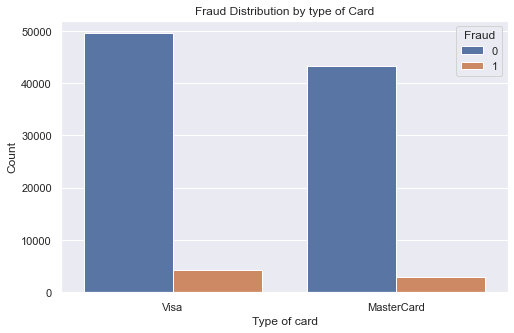

In [16]:
#2. Fraud distribution across types of cards
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Type of Card', hue='Fraud')
plt.title("Fraud Distribution by type of Card")
plt.xlabel("Type of card")
plt.ylabel("Count")
plt.show()

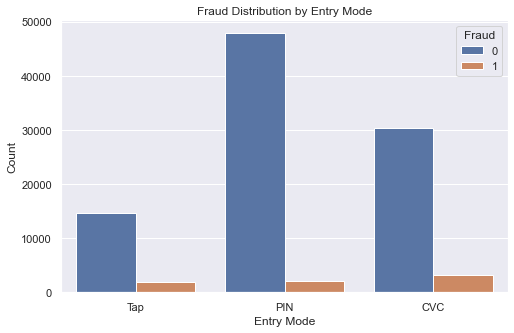

In [17]:
#3. Fraud frequency based on entry mode
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Entry Mode', hue='Fraud')
plt.title("Fraud Distribution by Entry Mode")
plt.xlabel("Entry Mode")
plt.ylabel("Count")
plt.show()

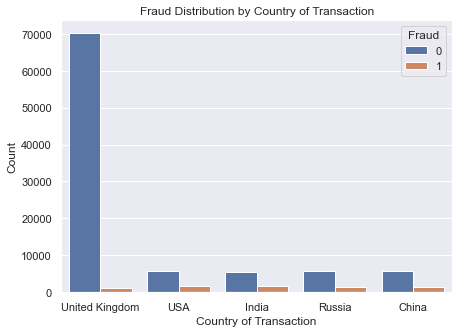

In [18]:
#4. Fraud Distribution by country of transaction
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Country of Transaction', hue='Fraud')
plt.title("Fraud Distribution by Country of Transaction")
plt.xlabel("Country of Transaction")
plt.ylabel("Count")
plt.show()